<a href="https://colab.research.google.com/github/razan-wari/Gaza-Sky-Geeks/blob/main/House_Rent_17Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

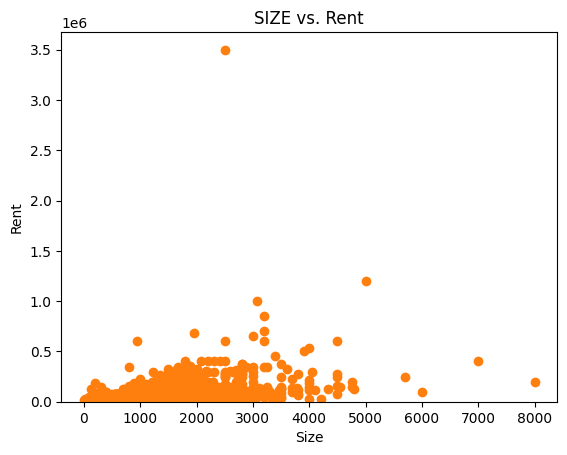

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

dataset = pd.read_csv('/content/House Rent.csv')
dataset.head()

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)


train_stats = train_dataset.describe()

train_stats = train_stats.transpose()
train_stats
x = dataset['Bathroom']

y = dataset['Size']

plt.xlabel('Bathroom')

plt.ylabel('Size')

plt.title('Line Plots')



plt.bar( x, y )

plt.scatter(dataset["Size"], dataset["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("SIZE vs. Rent")
plt.show()


